# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':10,
    'savefig.directory':'./Images'
})

In [152]:
c=np.loadtxt("FILE/PATH/element_699_0_13.txt",delimiter='\t',skiprows=0)

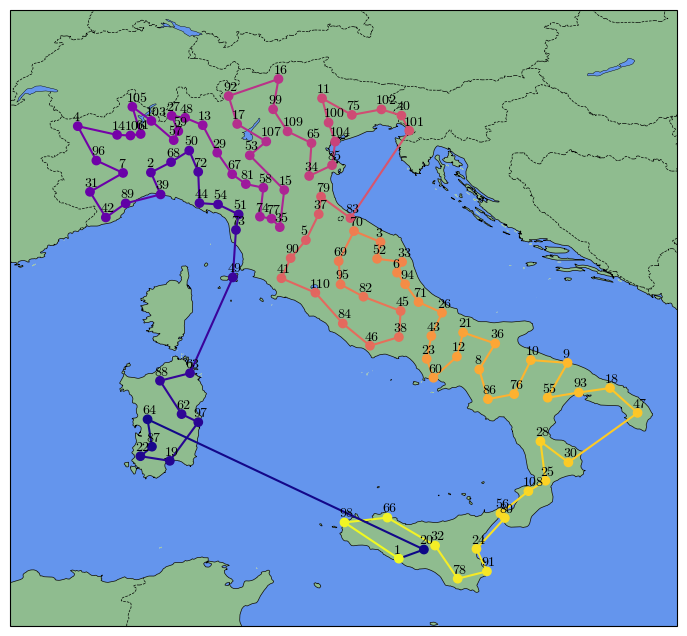

In [153]:
fig, axs = plt.subplots(1, 1, figsize=(9,8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'wspace': 0.02})

for i in range(1) :
    axs.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())
    axs.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
    axs.add_feature(cfeature.LAND, facecolor='darkseagreen')
    axs.add_feature(cfeature.COASTLINE, lw=0.5)
    axs.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
    axs.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)
x = c[:,1]
y = c[:,2]
l = c[:,0]
f = np.arange(len(x))
axs.scatter(x,y,c=f,cmap='plasma_r',zorder=2)
cmap = plt.get_cmap('plasma_r')
colors = cmap(f/f.max())
for i,txt in enumerate(l):
    axs.annotate(int(txt),(x[i]-0.1,y[i]+0.1))
    axs.plot(x[i:i+2],y[i:i+2],color=colors[i])
axs.plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)

In [159]:
f0=pd.read_csv('FILE/loss_0.txt',sep='\t')
f13=pd.read_csv('FILE/loss_13.txt',sep='\t')

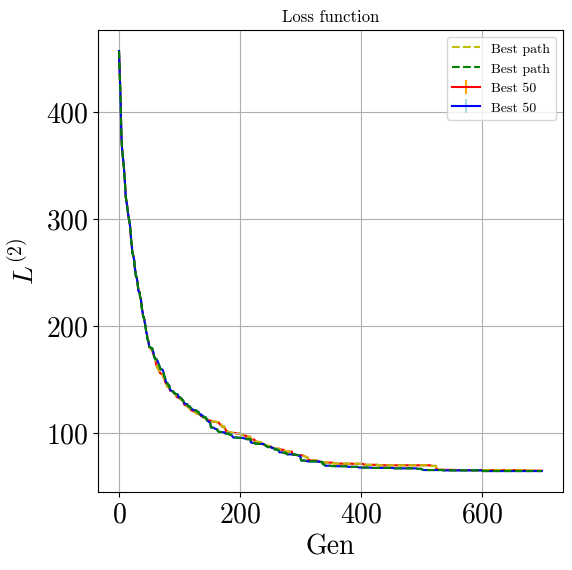

In [166]:
plt.errorbar(f0['Gen'],f0['Mean'],f0['Err'],color='r',ecolor='orange',label='Best 50',zorder=0)
plt.plot(f0['Gen'],f0['Best'],linestyle='--',color='y',label='Best path',zorder=1)
plt.errorbar(f13['Gen'],f13['Mean'],f13['Err'],color='b',ecolor='lightblue',label='Best 50',zorder=2)
plt.plot(f13['Gen'],f13['Best'],linestyle='--',color='g',label='Best path',zorder=3)
plt.legend()
plt.ylabel('$L^{(2)}$')
plt.xlabel('Gen')
plt.title('Loss function')
plt.grid()
plt.show()

In [27]:
c=np.loadtxt("CIRCLE/PATH/element_299_0_0.txt",delimiter='\t',skiprows=0)
d=np.loadtxt("CIRCLE/PATH/element_299_0_5.txt",delimiter='\t',skiprows=0)

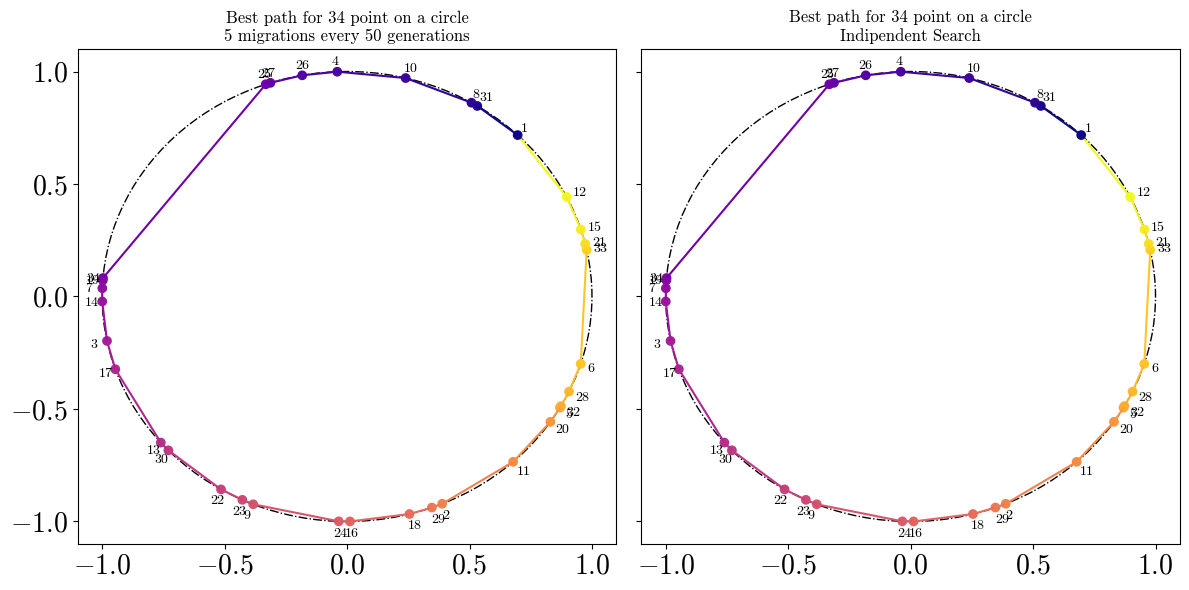

In [140]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey='row')

x = d[:,1]
y = d[:,2]
l = d[:,0]
f = np.arange(len(x))
ax[0].scatter(x,y,c=f,cmap='plasma',zorder=2)
cmap = plt.get_cmap('plasma')
colors = cmap(f/f.max())
circle1 = plt.Circle((0,0),1,color='black',linestyle='-.',fill=False,zorder=0)
for i,txt in enumerate(l):
    ax[0].annotate(int(txt),(x[i]*1.05-0.02,y[i]*1.05-0.02))
    ax[0].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[0].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[0].add_patch(circle1)
ax[0].set_title('Best path for 34 point on a circle\n5 migrations every 50 generations')

x = c[:,1]
y = c[:,2]
l = c[:,0]
ax[1].scatter(x,y,c=f,cmap='plasma',zorder=2)
circle1 = plt.Circle((0,0),1,color='black',linestyle='-.',fill=False,zorder=0)
for i,txt in enumerate(l):
    ax[1].annotate(int(txt),(x[i]*1.05-0.02,y[i]*1.05-0.02))
    ax[1].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[1].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[1].add_patch(circle1)
ax[1].set_title('Best path for 34 point on a circle\nIndipendent Search')

fig.tight_layout()


In [145]:
sp0=np.loadtxt("SQUARE/PATH/element_299_0_0.txt",delimiter='\t',skiprows=0)
sp5=np.loadtxt("SQUARE/PATH/element_299_0_5.txt",delimiter='\t',skiprows=0)

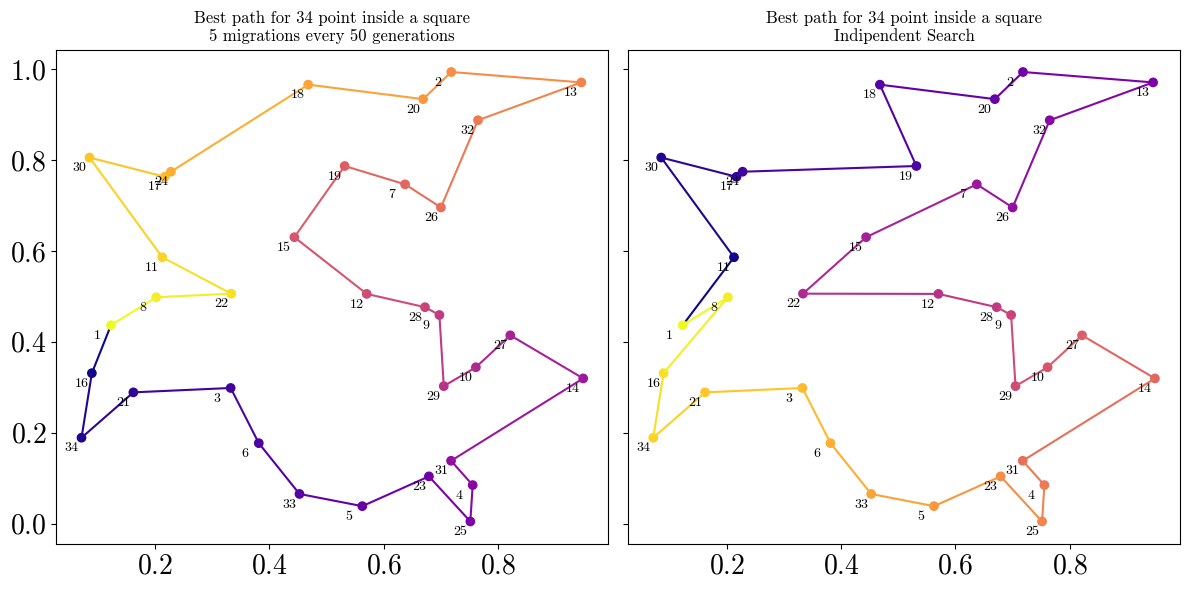

In [146]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey='row')
x = sp5[:,1]
y = sp5[:,2]
l = sp5[:,0]
f = np.arange(len(x))
ax[0].scatter(x,y,c=f,cmap='plasma_r',zorder=2)
cmap = plt.get_cmap('plasma_r')
colors = cmap(f/f.max())
for i,txt in enumerate(l):
    ax[0].annotate(int(txt),(x[i]-0.03,y[i]-0.03))
    ax[0].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[0].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[0].set_title('Best path for 34 point inside a square\n5 migrations every 50 generations')

x = sp0[:,1]
y = sp0[:,2]
l = sp0[:,0]
f = np.arange(len(x))
ax[1].scatter(x,y,c=f,cmap='plasma_r',zorder=2)
for i,txt in enumerate(l):
    ax[1].annotate(int(txt),(x[i]-0.03,y[i]-0.03))
    ax[1].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[1].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[1].set_title('Best path for 34 point inside a square\nIndipendent Search')

plt.tight_layout()

In [156]:
c0=pd.read_csv('CIRCLE/loss_0.txt',sep='\t')
c5=pd.read_csv('CIRCLE/loss_5.txt',sep='\t')
s0=pd.read_csv('SQUARE/loss_0.txt',sep='\t')
s5=pd.read_csv('SQUARE/loss_5.txt',sep='\t')

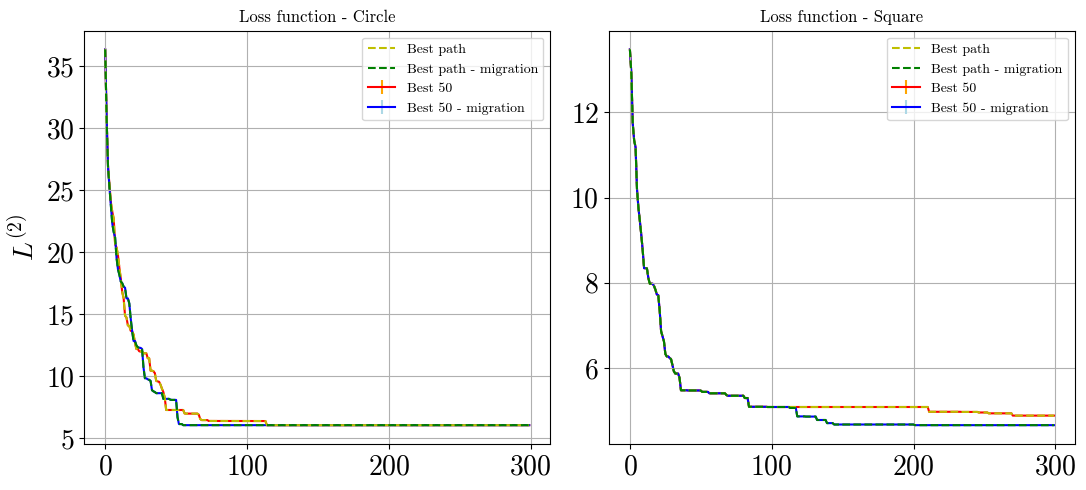

In [157]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.plot(c0['Gen'],c0['Best'],linestyle='--',color='y',label='Best path',zorder=2)
plt.errorbar(c0['Gen'],c0['Mean'],c0['Err'],color='r',ecolor='orange',label='Best 50',zorder=0)
plt.plot(c5['Gen'],c5['Best'],linestyle='--',color='g',label='Best path - migration',zorder=3)
plt.errorbar(c5['Gen'],c5['Mean'],c5['Err'],color='b',ecolor='lightblue',label='Best 50 - migration',zorder=1)
plt.legend()
plt.ylabel('$L^{(2)}$')
plt.grid()
plt.title('Loss function - Circle')

plt.subplot(1,2,2)
plt.plot(s0['Gen'],s0['Best'],linestyle='--',color='y',label='Best path',zorder=2)
plt.errorbar(s0['Gen'],s0['Mean'],s0['Err'],color='r',ecolor='orange',label='Best 50',zorder=0)
plt.plot(s5['Gen'],s5['Best'],linestyle='--',color='g',label='Best path - migration',zorder=3)
plt.errorbar(s5['Gen'],s5['Mean'],s5['Err'],color='b',ecolor='lightblue',label='Best 50 - migration',zorder=1)
plt.legend()
plt.grid()
plt.title('Loss function - Square')

plt.tight_layout()
plt.show()